In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


**Clean Missing values**

In [ ]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
df=df.dropna().reset_index(drop=True)
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [ ]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [ ]:
df=df.drop(122).reset_index(drop=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


 **Change datatype into int or float**


In [ ]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

df['Region']=df["Region"].astype('int')  ## change datatype into int
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [ ]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [ ]:
[feature for feature in df.columns if df[feature].dtype=='O']

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [ ]:
for fr in [feature for feature in df.columns if df[feature].dtype=='O']:
  if fr !='Classes':
    df[fr]=df[fr].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [ ]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv',index=False) ## to save the clean dataset

# EDA

In [ ]:
df_copy=df.drop(columns=['day','month','year'])
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [ ]:
df_copy['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
df_copy['Classes']=df_copy['Classes'].apply(lambda x:x.strip())
df_copy['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [ ]:
# df_copy[df_copy['Classes']=='fire']=1
# df_copy[df_copy['Classes']=='not fire']=0
## or,
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


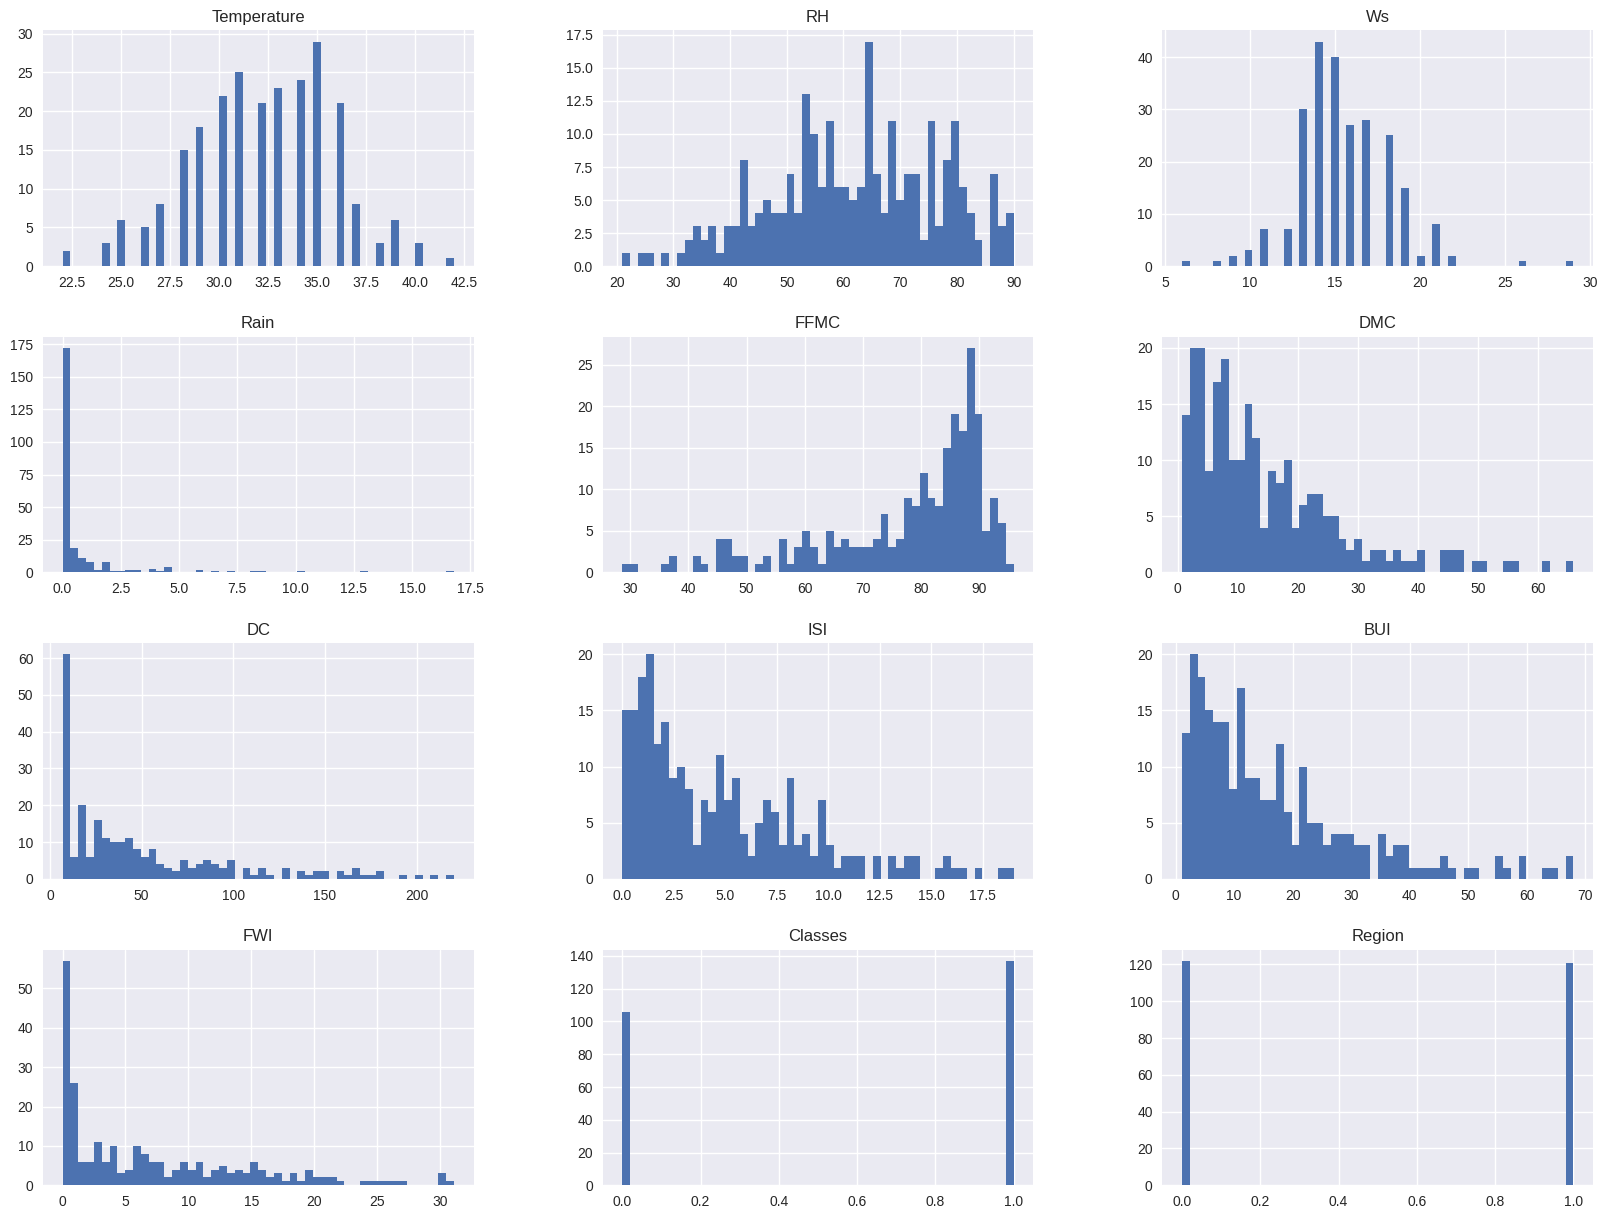

In [ ]:
## ploting
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
precentage_classes=df_copy['Classes'].value_counts(normalize=True)*100
precentage_classes

,proportion
Classes,
1,56.378601
0,43.621399


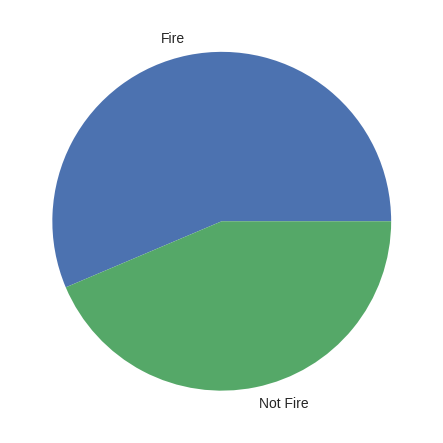

<Figure size 2000x1500 with 0 Axes>

In [ ]:
plt.pie(precentage_classes,labels=['Fire','Not Fire'])
plt.figure(figsize=(20,15))
plt.show()

In [ ]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

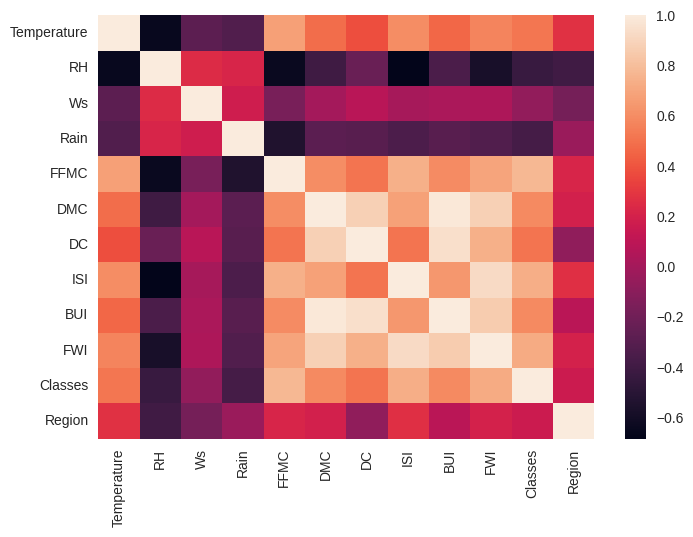

In [ ]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

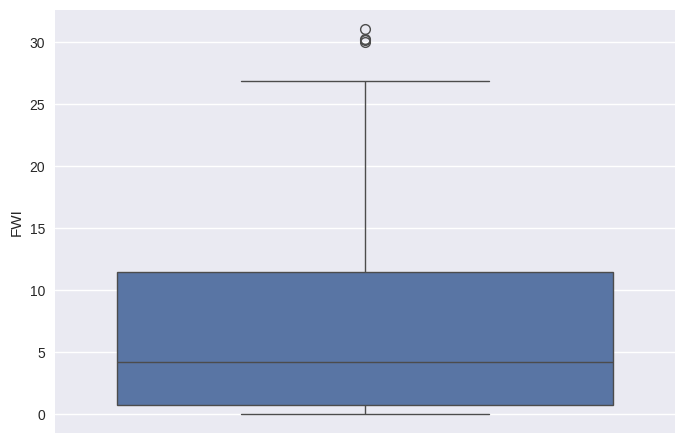

In [ ]:
sns.boxplot(df['FWI'])

/tmp/ipython-input-3378598648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Classes']=np.where(df_temp['Classes'].str.contains('not fire'),'Not Fire',"Fire")


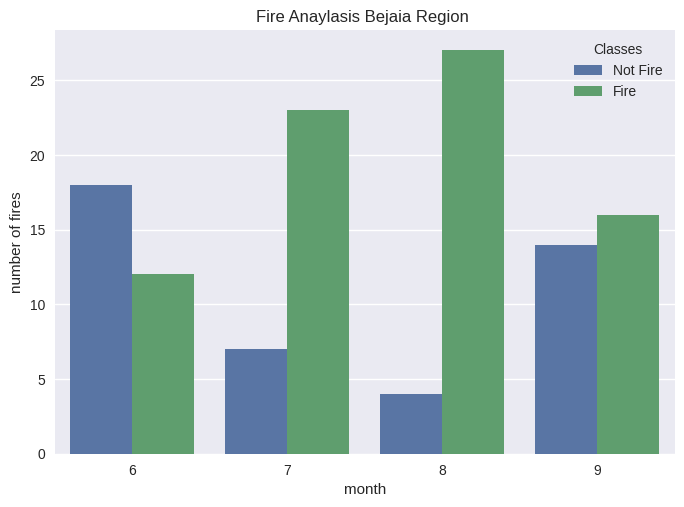

In [ ]:
df_temp=df[df['Region']==1]
df_temp['Classes']=np.where(df_temp['Classes'].str.contains('not fire'),'Not Fire',"Fire")
sns.countplot(x=df_temp["month"],hue=df_temp['Classes'],data=df_temp)
plt.ylabel('number of fires')
plt.xlabel('month')
plt.title('Fire Anaylasis Bejaia Region ')
plt.show()

/tmp/ipython-input-1574834461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Classes']=np.where(df_temp['Classes'].str.contains('not fire'),'Not Fire',"Fire")


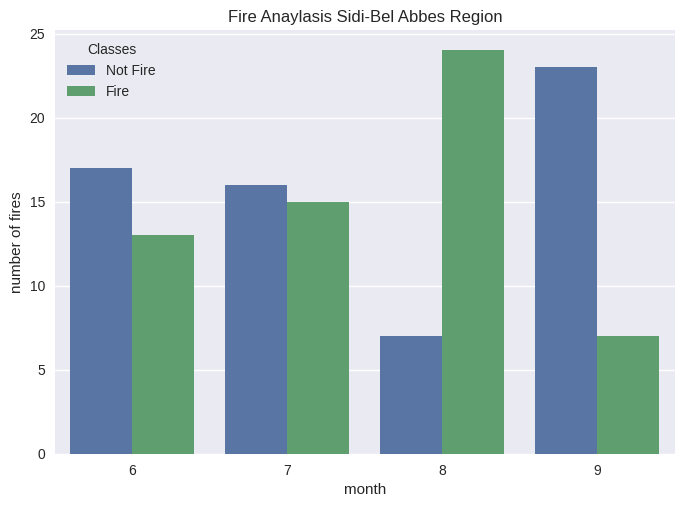

In [ ]:
df_temp=df[df['Region']==0]
df_temp['Classes']=np.where(df_temp['Classes'].str.contains('not fire'),'Not Fire',"Fire")
sns.countplot(x=df_temp["month"],hue=df_temp['Classes'],data=df_temp)
plt.ylabel('number of fires')
plt.xlabel('month')
plt.title('Fire Anaylasis Sidi-Bel Abbes Region')
plt.show()

## Model Training

In [ ]:
df.drop(['day',	"month",	"year"],axis=1,inplace=True)
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [ ]:
from sklearn.model_selection import train_test_split

x=df.drop('FWI',axis=1)
y=df[['FWI']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,x_test.shape)



(194, 11) (49, 11)


In [ ]:
from sklearn.feature_selection import VarianceThreshold
var=VarianceThreshold(threshold=0.05)
var.fit(x_train)
print(var.variances_,"\n",x_train.columns[var.get_support()])

[1.32780582e+01 2.24662663e+02 6.91635668e+00 4.33766394e+00
 1.98377266e+02 1.70426262e+02 2.48059901e+03 1.86780072e+01
 2.26307341e+02 2.45509618e-01 2.49973430e-01] 
 Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')


In [ ]:
corr_data=x_train.corr()
corr_data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

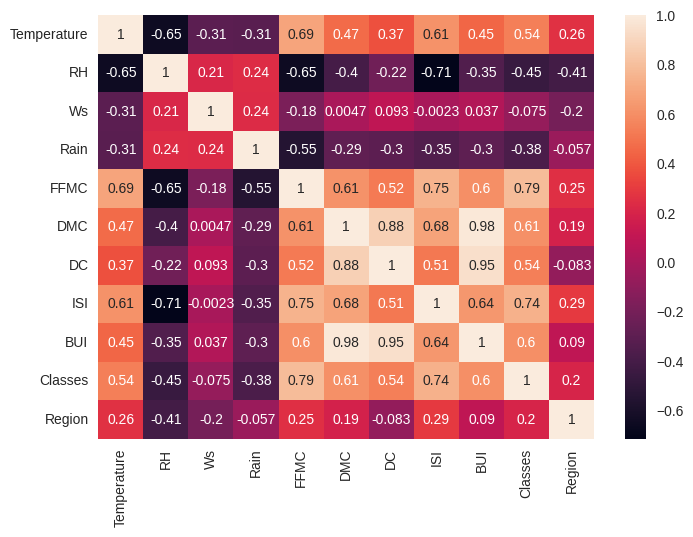

In [ ]:
sns.heatmap(corr_data,annot=True)

In [ ]:
## corr -> filter feature based on feature selection
def filter_features(x_train,threshold):
  corr_data=x_train.corr()
  cols=corr_data.columns
  remove_cols=set()

  for i in range(len(cols)):
    for j in range(i+1,len(cols)):
      if abs(corr_data.iloc[i,j])>threshold:
        remove_cols.add(cols[j])
  return list(remove_cols)

In [ ]:
drop_cols=filter_features(x_train,0.80)
drop_cols

['BUI', 'DC']

In [ ]:
## drop feature
x_train.drop(drop_cols,axis=1,inplace=True)
x_test.drop(drop_cols,axis=1,inplace=True)

print(x_train.shape,x_test.shape)

(194, 9) (49, 9)


In [ ]:
## Feature Scaling ->  StandardScaler
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

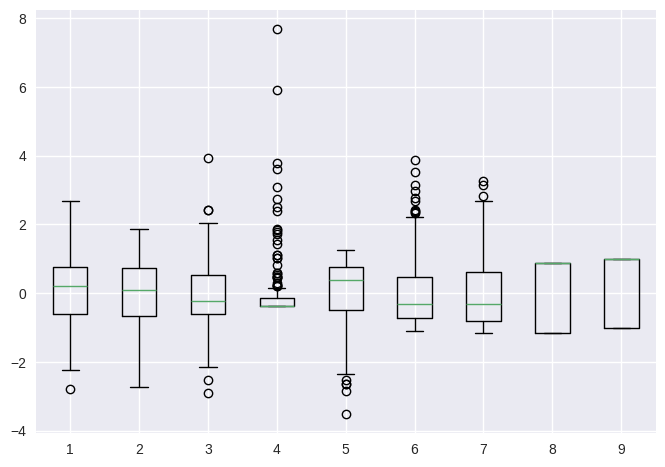

In [ ]:
plt.boxplot(x_train)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print("r2 -> ",r2_score(y_test,y_pred))
print("MAE -> ",mean_absolute_error(y_test,y_pred))
print("RMSE -> ",root_mean_squared_error(y_test,y_pred))

r2 ->  0.9805895859259882
MAE ->  0.5049978694165687
RMSE ->  0.7670065260940544


In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
efs=EFS(lr,max_features=9,print_progress=True,scoring='r2',cv=5,n_jobs=-1)
model_efs=efs.fit(x_train,y_train)


Features: 511/511

In [ ]:
print(model_efs.best_score_)
print(model_efs.best_feature_names_)

0.9554749891732743
('3', '5', '6', '8')


In [ ]:
all_scores=pd.DataFrame(model_efs.subsets_).T.set_index('feature_names')
all_scores

,feature_idx,cv_scores,avg_score
feature_names,,,
"(0,)","(0,)","[0.29738121783601823, 0.17026684498242484, 0.2...",0.312127
"(1,)","(1,)","[0.3392768144285392, 0.32197446529866236, 0.55...",0.325064
"(2,)","(2,)","[-0.017242993128400608, -0.003181321901517542,...",-0.044831
"(3,)","(3,)","[0.09196192215137644, 0.045668779807650606, 0....",0.081975
"(4,)","(4,)","[0.45538770919988103, 0.48273288128379443, 0.5...",0.49692
...,...,...,...
"(0, 1, 2, 4, 5, 6, 7, 8)","(0, 1, 2, 4, 5, 6, 7, 8)","[0.9882542646023805, 0.9774666748555092, 0.844...",0.954281
"(0, 1, 3, 4, 5, 6, 7, 8)","(0, 1, 3, 4, 5, 6, 7, 8)","[0.9882535880145287, 0.9771709700319318, 0.844...",0.954466
"(0, 2, 3, 4, 5, 6, 7, 8)","(0, 2, 3, 4, 5, 6, 7, 8)","[0.9882263601783776, 0.9777264688853207, 0.846...",0.954589


In [ ]:
x_train=model_efs.transform(x_train)
x_test=model_efs.transform(x_test)
print(x_train.shape,x_test.shape)

(194, 4) (49, 4)


# Linear Regression Model

r2 ->  0.9698668722976737
MAE ->  0.7012825782923633
RMSE ->  0.9556607846121988


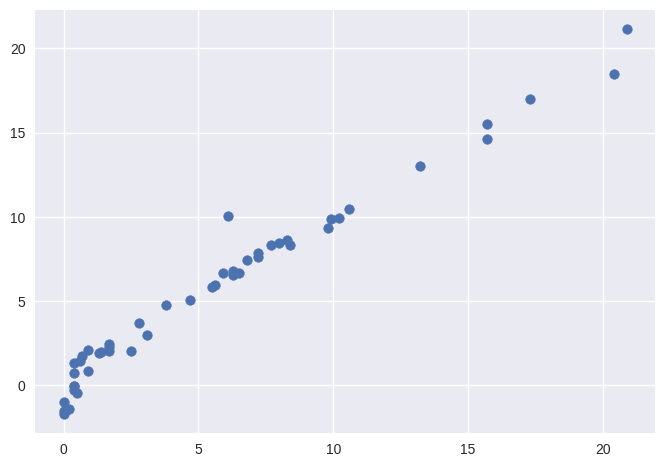

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error


lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print("r2 -> ",r2_score(y_test,y_pred))
print("MAE -> ",mean_absolute_error(y_test,y_pred))
print("RMSE -> ",root_mean_squared_error(y_test,y_pred))

plt.scatter(y_test,y_pred)


# Ridge Regression Model

r2 ->  0.9670972633340277
MAE ->  0.7468325193277925
RMSE ->  0.9986140451050962
Best Alpha ->  10.0


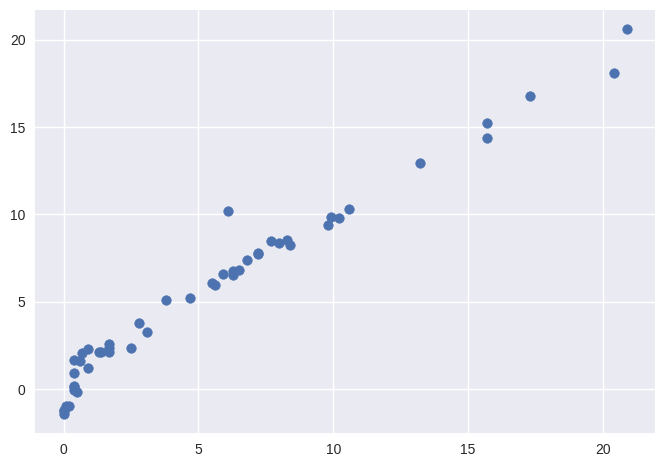

In [ ]:
from sklearn.linear_model import RidgeCV

lr=RidgeCV(cv=10)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print("r2 -> ",r2_score(y_test,y_pred))
print("MAE -> ",mean_absolute_error(y_test,y_pred))
print("RMSE -> ",root_mean_squared_error(y_test,y_pred))
print("Best Alpha -> ",lr.alpha_)

plt.scatter(y_test,y_pred)

# Lasso Regression Model

r2 ->  0.9695215044286938
MAE ->  0.7042293652118411
RMSE ->  0.9611217873860253
Best Alpha ->  0.02038158904005709
all alphas -> [7.1563667  6.67405153 6.2242428  5.80474966 5.41352896 5.04867523
 4.70841142 4.39108025 4.09513613 3.81913766 3.56174057 3.32169117
 3.09782031 2.88903759 2.69432612 2.51273756 2.34338746 2.18545099
 2.0381589  1.90079382 1.77268667 1.65321353 1.54179247 1.43788081
 1.34097246 1.2505954  1.16630946 1.08770411 1.01439649 0.94602956
 0.88227033 0.82280827 0.76735374 0.71563667 0.66740515 0.62242428
 0.58047497 0.5413529  0.50486752 0.47084114 0.43910802 0.40951361
 0.38191377 0.35617406 0.33216912 0.30978203 0.28890376 0.26943261
 0.25127376 0.23433875 0.2185451  0.20381589 0.19007938 0.17726867
 0.16532135 0.15417925 0.14378808 0.13409725 0.12505954 0.11663095
 0.10877041 0.10143965 0.09460296 0.08822703 0.08228083 0.07673537
 0.07156367 0.06674052 0.06224243 0.0580475  0.05413529 0.05048675
 0.04708411 0.0439108  0.04095136 0.03819138 0.03561741 0.03321691

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


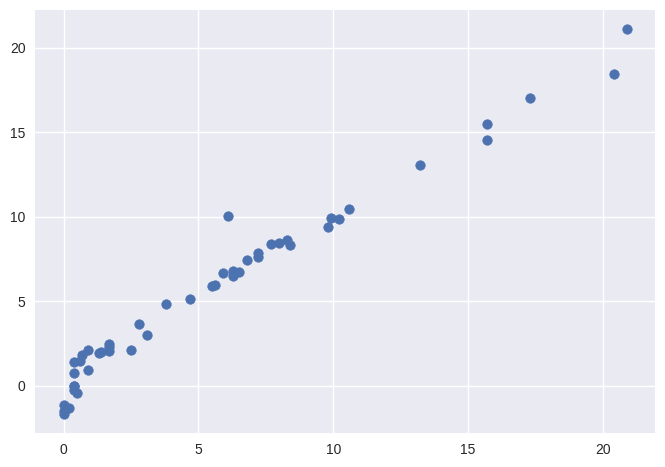

In [ ]:
from sklearn.linear_model import LassoCV

lasso=LassoCV(cv=10)
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)

print("r2 -> ",r2_score(y_test,y_pred))
print("MAE -> ",mean_absolute_error(y_test,y_pred))
print("RMSE -> ",root_mean_squared_error(y_test,y_pred))
print("Best Alpha -> ",lasso.alpha_)
print('all alphas ->',lasso.alphas_)

plt.scatter(y_test,y_pred)

# ElasticNet Regression Model

r2 ->  0.9691060081117511
MAE ->  0.7103035366086621
RMSE ->  0.9676508294266002
Best Alpha ->  0.02681944920154019


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


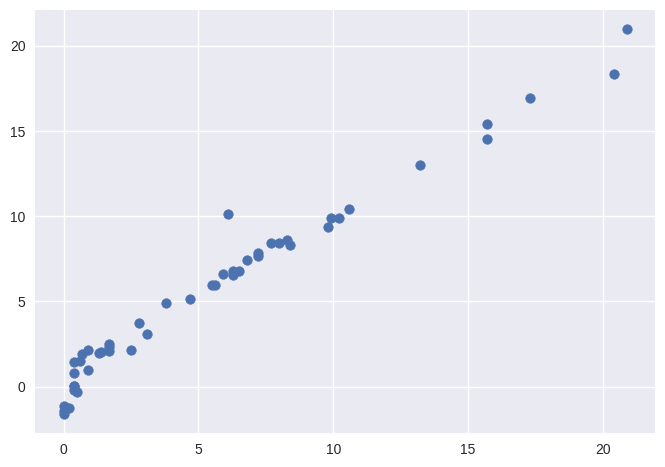

In [ ]:
from sklearn.linear_model import ElasticNetCV

lr=ElasticNetCV(cv=10)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print("r2 -> ",r2_score(y_test,y_pred))
print("MAE -> ",mean_absolute_error(y_test,y_pred))
print("RMSE -> ",root_mean_squared_error(y_test,y_pred))
print("Best Alpha -> ",lr.alpha_)

plt.scatter(y_test,y_pred)

In [ ]:
lasso

LassoCV(cv=10)

In [ ]:
std

StandardScaler()

In [ ]:
model_efs

ExhaustiveFeatureSelector(estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8]],
                          max_features=9, n_jobs=-1, scoring='r2')

In [ ]:
import pickle
pickle.dump(std,open("scaler.pkl","wb"))
pickle.dump(lasso,open("lasso.pkl","wb"))
pickle.dump(model_efs,open("efs.pkl","wb"))